
# SEGMENTATION


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset
data = pd.read_csv('simulated_transaction_2024.csv')
data.head()

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,01/01/2023,00:00,678330503.0,2971.0,1584.0,NaN,Westport Care Home
1,01/01/2023,00:00,472213568.0,3792.0,1950.0,NaN,Barbiee Boutique
2,01/01/2023,00:00,472213568.0,3012.0,-780.0,283027736.0,NaN
3,01/01/2023,00:00,283027736.0,1787.0,780.0,472213568.0,NaN
4,01/01/2023,00:00,624500124.0,3226.0,1825.0,NaN,Fat Face


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230596 entries, 0 to 230595
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    230367 non-null  object 
 1   Timestamp               230345 non-null  object 
 2   Account No              230372 non-null  float64
 3   Balance                 230350 non-null  float64
 4   Amount                  230387 non-null  float64
 5   Third Party Account No  6832 non-null    float64
 6   Third Party Name        223517 non-null  object 
dtypes: float64(4), object(3)
memory usage: 12.3+ MB


In [3]:
data.shape 

(230596, 7)

In [4]:
data.columns

Index(['Date', 'Timestamp', 'Account No', 'Balance', 'Amount',
       'Third Party Account No', 'Third Party Name'],
      dtype='object')

In [5]:
data.dtypes

Date                       object
Timestamp                  object
Account No                float64
Balance                   float64
Amount                    float64
Third Party Account No    float64
Third Party Name           object
dtype: object

In [6]:
data.describe()

,Account No,Balance,Amount,Third Party Account No
count,2.303720e+05,230350.000000,230387.000000,6.832000e+03
mean,5.505993e+08,3609.351057,6.437717,5.370263e+08
std,2.560610e+08,5379.331174,508.200101,2.596927e+08
min,1.015313e+08,-5790.983500,-12240.000000,1.019085e+08
25%,3.314502e+08,373.453932,-74.000000,3.114679e+08
50%,5.501698e+08,1686.009850,-28.700000,5.381491e+08
75%,7.682718e+08,5215.031852,-12.060000,7.485097e+08
max,9.997527e+08,46804.158837,12240.000000,9.997527e+08


In [7]:
data.isnull().sum()

Date                         229
Timestamp                    251
Account No                   224
Balance                      246
Amount                       209
Third Party Account No    223764
Third Party Name            7079
dtype: int64

In [8]:
data.nunique()

Date                         340
Timestamp                   1401
Account No                   976
Balance                   229888
Amount                     17314
Third Party Account No       673
Third Party Name              83
dtype: int64

In [9]:
# Convert 'Third Party Account No' to nullable integer type
data['Third Party Account No'] = data['Third Party Account No'].astype('Int64')

In [10]:
# Create a new 'Third Party' column
data['Third Party'] = data['Third Party Name'].combine_first(data['Third Party Account No'])

In [11]:
# Drop the original 'Third Party Account No' and 'Third Party Name' columns
data.drop(columns=['Third Party Account No', 'Third Party Name'], inplace=True)

In [12]:
data.isnull().sum()

Date           229
Timestamp      251
Account No     224
Balance        246
Amount         209
Third Party    247
dtype: int64

In [13]:
data = data.dropna()
# Check null values after dropping
print(data.isnull().sum())

Date           0
Timestamp      0
Account No     0
Balance        0
Amount         0
Third Party    0
dtype: int64


In [14]:
# Identify debits and credits
debits = data[data['Amount'] < 0]
credits = data[data['Amount'] > 0]

In [15]:
# nearest integer/ rounding
data['Balance'] = data['Balance'].round().astype(int)
data['Amount'] = data['Amount'].round().astype(int)

In [16]:
data['Account No'] = data['Account No'].round().astype(int)

In [17]:
data

,Date,Timestamp,Account No,Balance,Amount,Third Party
0,01/01/2023,00:00,678330503,2971,1584,Westport Care Home
1,01/01/2023,00:00,472213568,3792,1950,Barbiee Boutique
2,01/01/2023,00:00,472213568,3012,-780,283027736
3,01/01/2023,00:00,283027736,1787,780,472213568
4,01/01/2023,00:00,624500124,3226,1825,Fat Face
...,...,...,...,...,...,...
230591,06/12/2023,20:54,581655972,45935,-41,Tesco
230592,06/12/2023,20:55,786141370,-245,-62,Sainsbury Local
230593,06/12/2023,21:05,824916823,9709,-33,Deliveroo
230594,06/12/2023,21:13,366550080,26834,-19,Amazon


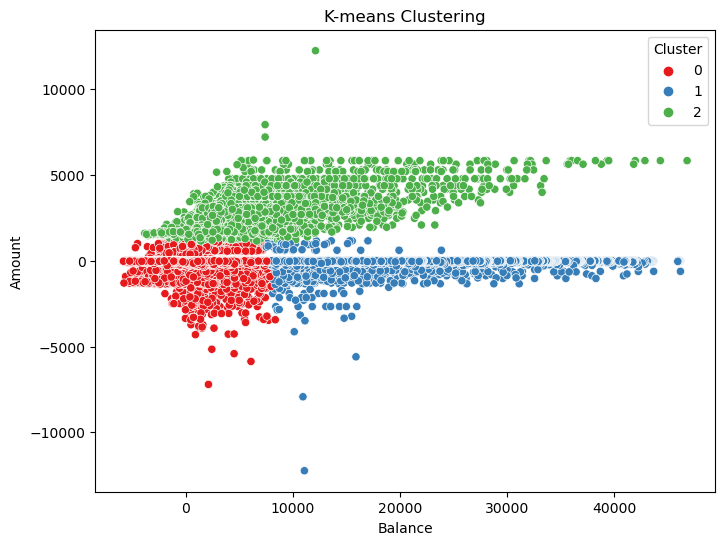

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features
X = data[['Balance', 'Amount']]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (you can experiment with different values)
k = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Balance', y='Amount', hue='Cluster', data=data, palette='Set1')
plt.title('K-means Clustering')
plt.xlabel('Balance')
plt.ylabel('Amount')
plt.show()

In [19]:
 #Label the transactions as debit or credit
data['Transaction Type'] = ['Credit' if amt > 0 else 'Debit' for amt in data['Amount']]

# Temporal analysis:

In [20]:
# Convert 'Date' and 'Timestamp' columns to datetime
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Timestamp'])

# Drop the 'Timestamp' column as it's no longer needed
data.drop(columns=['Timestamp'], inplace=True)

In [21]:
data

,Date,Account No,Balance,Amount,Third Party,Cluster,Transaction Type,Datetime
0,01/01/2023,678330503,2971,1584,Westport Care Home,2,Credit,2023-01-01 00:00:00
1,01/01/2023,472213568,3792,1950,Barbiee Boutique,2,Credit,2023-01-01 00:00:00
2,01/01/2023,472213568,3012,-780,283027736,0,Debit,2023-01-01 00:00:00
3,01/01/2023,283027736,1787,780,472213568,0,Credit,2023-01-01 00:00:00
4,01/01/2023,624500124,3226,1825,Fat Face,2,Credit,2023-01-01 00:00:00
...,...,...,...,...,...,...,...,...
230591,06/12/2023,581655972,45935,-41,Tesco,1,Debit,2023-06-12 20:54:00
230592,06/12/2023,786141370,-245,-62,Sainsbury Local,0,Debit,2023-06-12 20:55:00
230593,06/12/2023,824916823,9709,-33,Deliveroo,1,Debit,2023-06-12 21:05:00
230594,06/12/2023,366550080,26834,-19,Amazon,1,Debit,2023-06-12 21:13:00


         Account No        Balance         Amount        Cluster
count  2.291940e+05  229194.000000  229194.000000  229194.000000
mean   5.505905e+08    3609.254871       6.584400       0.218867
std    2.560544e+08    5378.992507     508.690911       0.489478
min    1.015313e+08   -5791.000000  -12240.000000       0.000000
25%    3.314502e+08     373.000000     -74.000000       0.000000
50%    5.501698e+08    1686.000000     -29.000000       0.000000
75%    7.682718e+08    5215.000000     -12.000000       0.000000
max    9.997527e+08   46804.000000   12240.000000       2.000000
Debit     218818
Credit     10376
Name: Transaction Type, dtype: int64
Date                0
Account No          0
Balance             0
Amount              0
Third Party         0
Cluster             0
Transaction Type    0
Datetime            0
dtype: int64


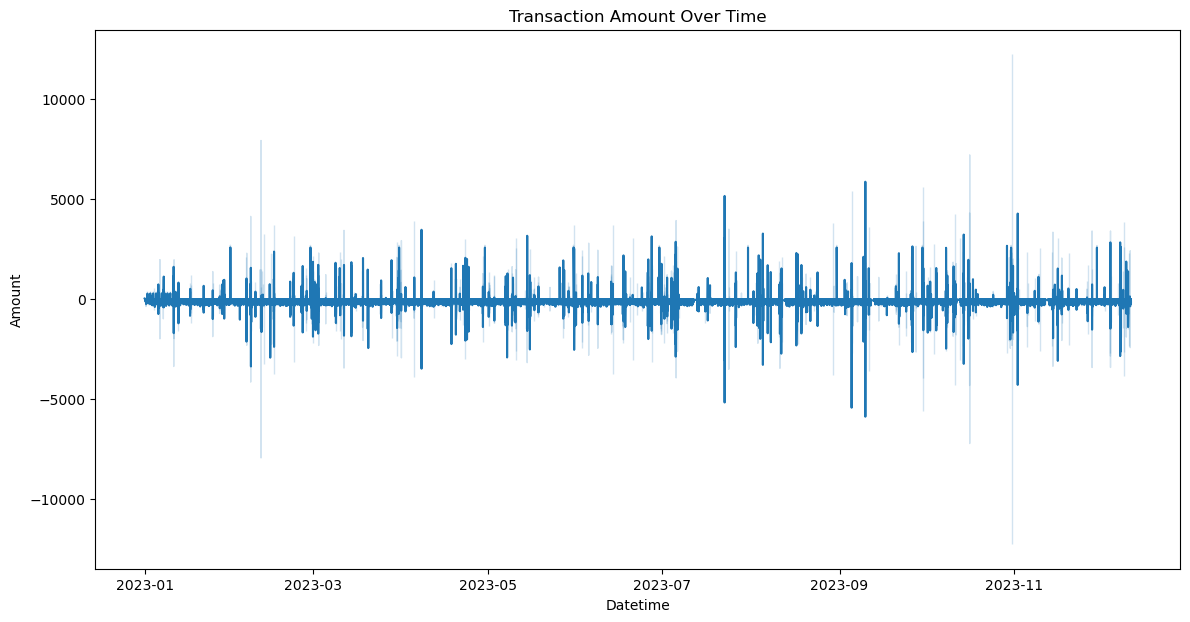

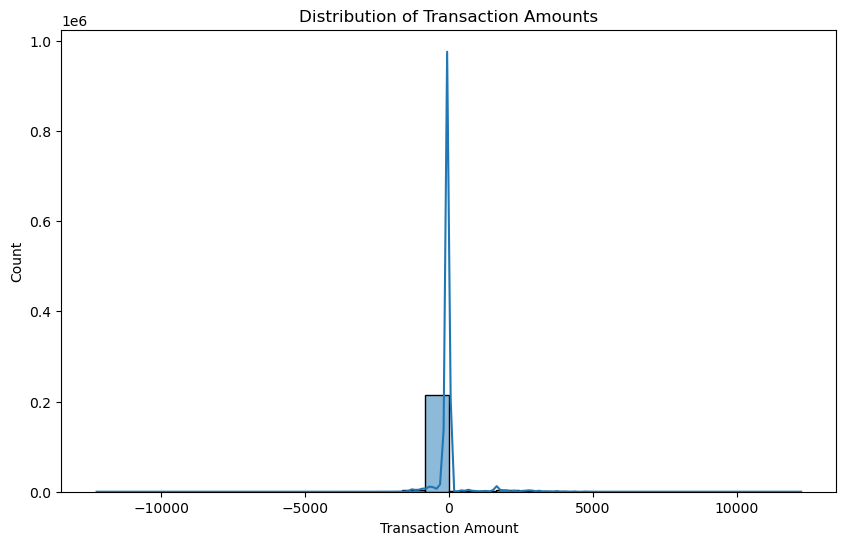

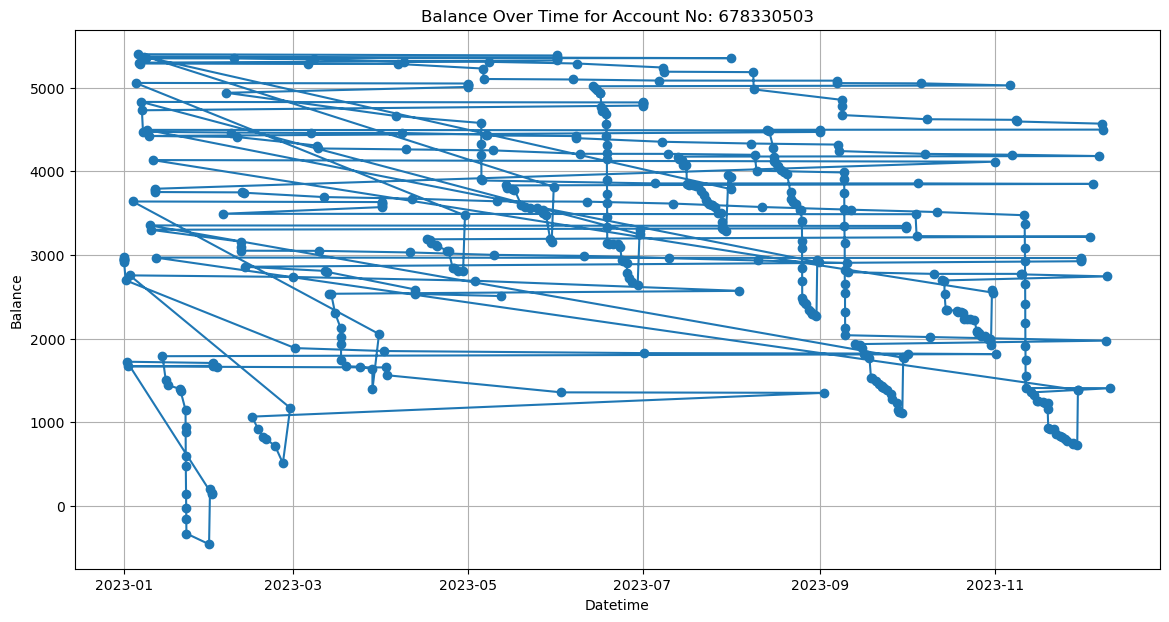

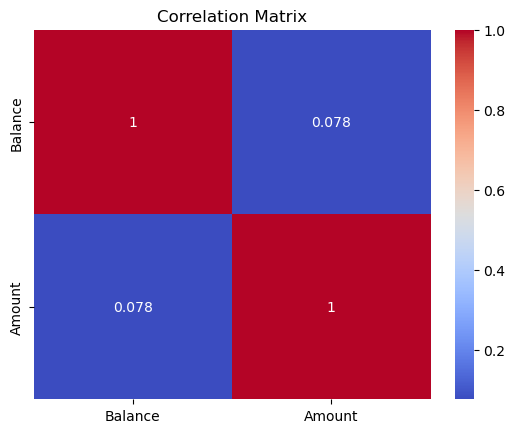

In [22]:
## EDA

# Assuming 'data' is your DataFrame
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Descriptive statistics
print(data.describe())
print(data['Transaction Type'].value_counts())

# Missing values check
print(data.isnull().sum())

# New features
data['Day of Week'] = data['Datetime'].dt.day_name()
data['Hour of Day'] = data['Datetime'].dt.hour

# Transaction trends
plt.figure(figsize=(14, 7))
sns.lineplot(x='Datetime', y='Amount', data=data)
plt.title('Transaction Amount Over Time')
plt.xlabel('Datetime')
plt.ylabel('Amount')
plt.show()

# Distribution of transactions
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.show()

# Balance over time for a specific account
sample_account = data[data['Account No'] == data['Account No'].unique()[0]]
plt.figure(figsize=(14, 7))
plt.plot(sample_account['Datetime'], sample_account['Balance'], marker='o')
plt.title('Balance Over Time for Account No: {}'.format(sample_account['Account No'].iloc[0]))
plt.xlabel('Datetime')
plt.ylabel('Balance')
plt.grid(True)
plt.show()

# Correlation matrix
corr = data[['Balance', 'Amount']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

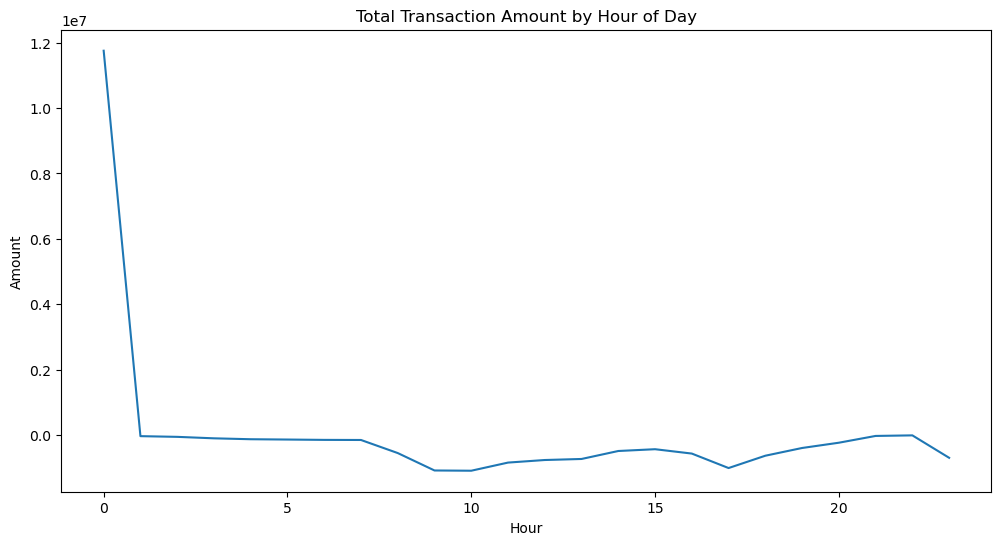

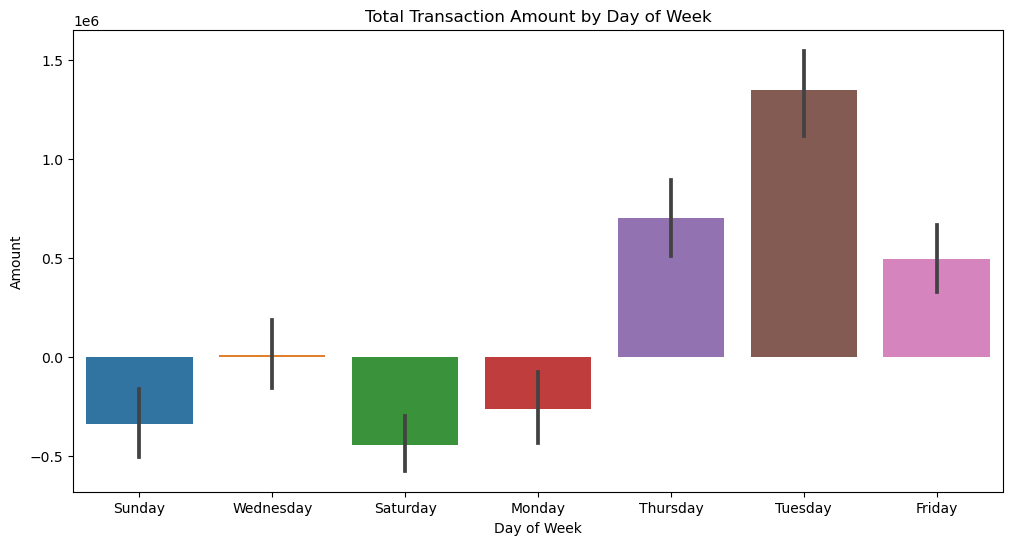

In [23]:
# Assuming data is already loaded into a DataFrame named `data`
# Convert 'Datetime' from string to datetime format if not already done
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Create time-based features
data['Hour'] = data['Datetime'].dt.hour
data['Day of Week'] = data['Datetime'].dt.day_name()
data['Month'] = data['Datetime'].dt.month

# Plot transactions over time to identify peaks
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Amount', data=data, estimator=sum, ci=None)
plt.title('Total Transaction Amount by Hour of Day')
plt.show()

# Analyzing transactions by day of week
plt.figure(figsize=(12, 6))
sns.barplot(x='Day of Week', y='Amount', data=data, estimator=sum)
plt.title('Total Transaction Amount by Day of Week')
plt.show()

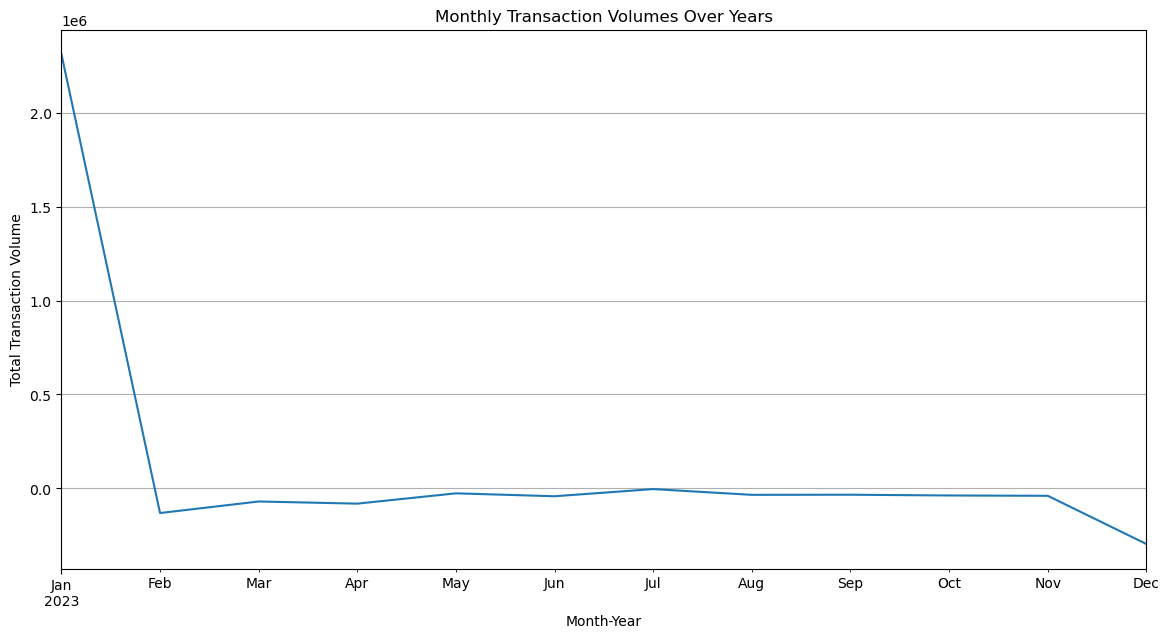

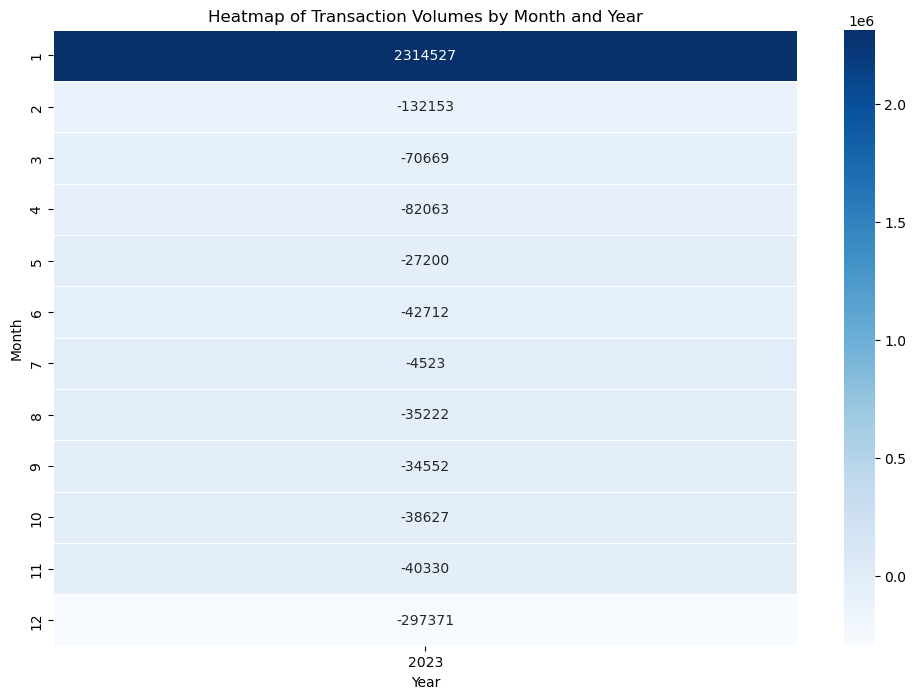

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare the data
data['Month-Year'] = data['Datetime'].dt.to_period('M')
monthly_data = data.groupby('Month-Year')['Amount'].sum()

# Plotting a line graph of monthly transaction volumes over multiple years
plt.figure(figsize=(14, 7))
monthly_data.plot(title='Monthly Transaction Volumes Over Years')
plt.xlabel('Month-Year')
plt.ylabel('Total Transaction Volume')
plt.grid(True)
plt.show()

# Creating a heatmap of monthly data for multiple years
data['Year'] = data['Datetime'].dt.year
data['Month'] = data['Datetime'].dt.month
pivot_table = data.pivot_table(values='Amount', index='Month', columns='Year', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", linewidths=.5, cmap='Blues')
plt.title('Heatmap of Transaction Volumes by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


In [25]:
## marketing

In [26]:
data['Third Party Name'] = data['Third Party'].apply(lambda x: x if isinstance(x, str) else None)
data['Third Party Account No'] = data['Third Party'].apply(lambda x: x if isinstance(x, int) else None)

In [27]:
data['Third Party Name'] = data['Third Party Name'].str.upper().str.strip()

In [28]:
frequent_parties = data['Third Party Name'].value_counts().head(10)

In [29]:
frequent_parties

TESCO            33922
SPORTS DIRECT    16171
TOPSHOP          10276
AMAZON            9562
FAT FACE          9505
PUREGYM           8258
MATALAN           8042
NETFLIX           7744
JUSTEAT           7123
DELIVEROO         6935
Name: Third Party Name, dtype: int64

In [30]:
pivot_data = data.pivot_table(values='Amount', index='Third Party Name', aggfunc=['sum', 'count'])

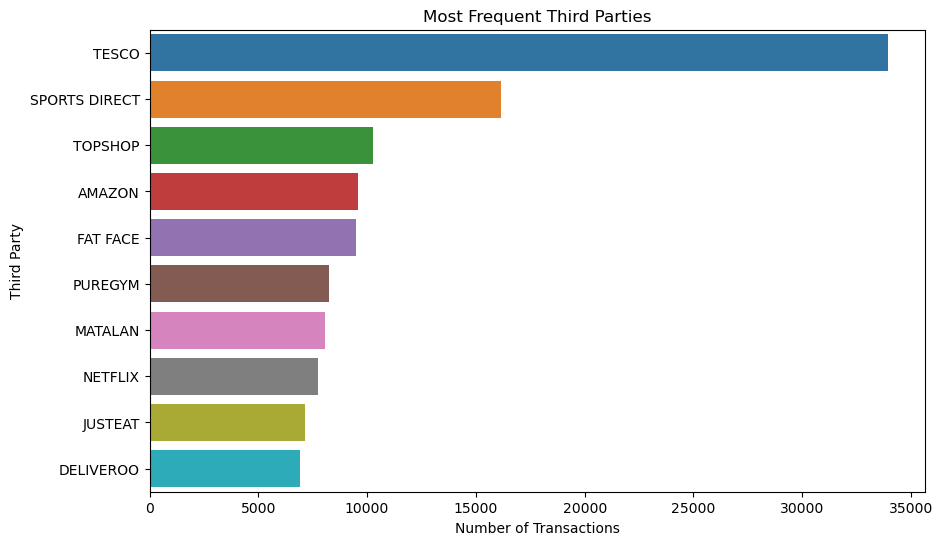

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top third parties by transaction count
plt.figure(figsize=(10, 6))
sns.barplot(x=frequent_parties.values, y=frequent_parties.index)
plt.title('Most Frequent Third Parties')
plt.xlabel('Number of Transactions')
plt.ylabel('Third Party')
plt.show()

In [32]:
import pandas as pd

# Assuming 'data' is your DataFrame already loaded from previous analysis or an external file

# Define the top third parties from your provided list
frequent_parties = ['Tesco', 'Sports Direct', 'Topshop', 'Amazon', 'Fat Face', 
                    'PureGym', 'Matalan', 'Netflix', 'JustEat', 'Deliveroo']

# Filter your data to include only transactions with these top third parties
top_data = data[data['Third Party'].isin(frequent_parties)]

# Customer Profiling
# Define a function to create profiles based on transactions with specific third parties
def identify_profile(third_party):
    if third_party in ['Amazon']:
        return 'Tech-Savvy Shopper'
    elif third_party in ['PureGym']:
        return 'Fitness Enthusiast'
    elif third_party in ['Sports Direct']:
        return 'Sports Equipment Lover'
    elif third_party in ['Tesco', 'Topshop', 'Fat Face', 'Matalan']:
        return 'Regular Retail Shopper'
    elif third_party in ['Netflix', 'JustEat', 'Deliveroo']:
        return 'Home Entertainment Lover'
    else:
        return 'General Shopper'

top_data['Customer Profile'] = top_data['Third Party'].apply(identify_profile)

# Personalized Communication
# Map personalized messages to different customer segments
personalized_messages = {
    'Tech-Savvy Shopper': "Explore the latest tech gadgets on Amazon with our exclusive card rewards!",
    'Fitness Enthusiast': "Stay fit and healthy! Enjoy special offers from PureGym just for you.",
    'Sports Equipment Lover': "Get ready to elevate your game with the best deals from Sports Direct!",
    'Regular Retail Shopper': "Discover the best shopping deals and enjoy exclusive rewards at Tesco and more!",
    'Home Entertainment Lover': "Enhance your home entertainment with exclusive offers from Netflix, JustEat, and Deliveroo!"
}

top_data['Personalized Message'] = top_data['Customer Profile'].map(personalized_messages)

# Product Customization
# Suggest products based on customer profiles
product_suggestions = {
    'Tech-Savvy Shopper': 'High-Tech Rewards Card',
    'Fitness Enthusiast': 'Fitness Fanatic Credit Card',
    'Sports Equipment Lover': 'Sports Rewards Card',
    'Regular Retail Shopper': 'Premium Retail Rewards Card',
    'Home Entertainment Lover': 'Entertainment Rewards Card'
}

top_data['Suggested Product'] = top_data['Customer Profile'].map(product_suggestions)

# Display the enhanced dataset with profiles, messages, and product suggestions
print(top_data[['Account No', 'Third Party', 'Customer Profile', 'Personalized Message', 'Suggested Product']])


        Account No Third Party          Customer Profile  \
4        624500124    Fat Face    Regular Retail Shopper   
9        456221621       Tesco    Regular Retail Shopper   
16       407574996    Fat Face    Regular Retail Shopper   
27       522188082       Tesco    Regular Retail Shopper   
45       200080192    Fat Face    Regular Retail Shopper   
...            ...         ...                       ...   
230587   975345315       Tesco    Regular Retail Shopper   
230591   581655972       Tesco    Regular Retail Shopper   
230593   824916823   Deliveroo  Home Entertainment Lover   
230594   366550080      Amazon        Tech-Savvy Shopper   
230595   259015404     JustEat  Home Entertainment Lover   

                                     Personalized Message  \
4       Discover the best shopping deals and enjoy exc...   
9       Discover the best shopping deals and enjoy exc...   
16      Discover the best shopping deals and enjoy exc...   
27      Discover the best shopping 

In [33]:
import pandas as pd

# Assuming 'data' is your DataFrame already loaded from previous analysis

# Filter data for only the top third parties you are interested in
frequent_parties = ['Tesco', 'Sports Direct', 'Topshop', 'Amazon', 'Fat Face', 
                    'PureGym', 'Matalan', 'Netflix', 'JustEat', 'Deliveroo']
top_data = data[data['Third Party'].isin(frequent_parties)]

# Calculate frequency of transactions for each third party
transaction_frequencies = top_data['Third Party'].value_counts()

# Calculate total amount spent at each third party
total_spent = top_data.groupby('Third Party')['Amount'].sum()

# Calculate the number of unique users (accounts) for each third party
unique_users = top_data.groupby('Third Party')['Account No'].nunique()

# Combine all these metrics into a single DataFrame for a comprehensive overview
third_party_analysis = pd.DataFrame({
    'Frequency of Transactions': transaction_frequencies,
    'Total Amount Spent': total_spent,
    'Unique Users': unique_users
})

# Print the combined analysis
print(third_party_analysis)


               Frequency of Transactions  Total Amount Spent  Unique Users
Amazon                              7545             -122663           598
Deliveroo                           6935             -195472           889
Fat Face                            9505             -450559           809
JustEat                             7123             -200507           904
Matalan                             8042             -261848           783
Netflix                             7744             -123904           649
PureGym                             8258             -156902           692
Sports Direct                      16171             -990622           817
Tesco                              33922            -2240064           946
Topshop                            10276            -1065748           831


### Analaysis
Transaction Frequencies: This metric shows how many transactions each third party has, which helps identify the most frequented businesses by your customers.

Total Amount Spent: Knowing the total amount spent can indicate the financial significance of each third party in your customers' spending habits.

Unique Users: The number of unique users transacting with each third party highlights how widely used a third party is among your customer base, which can be crucial for targeted marketing strategies.

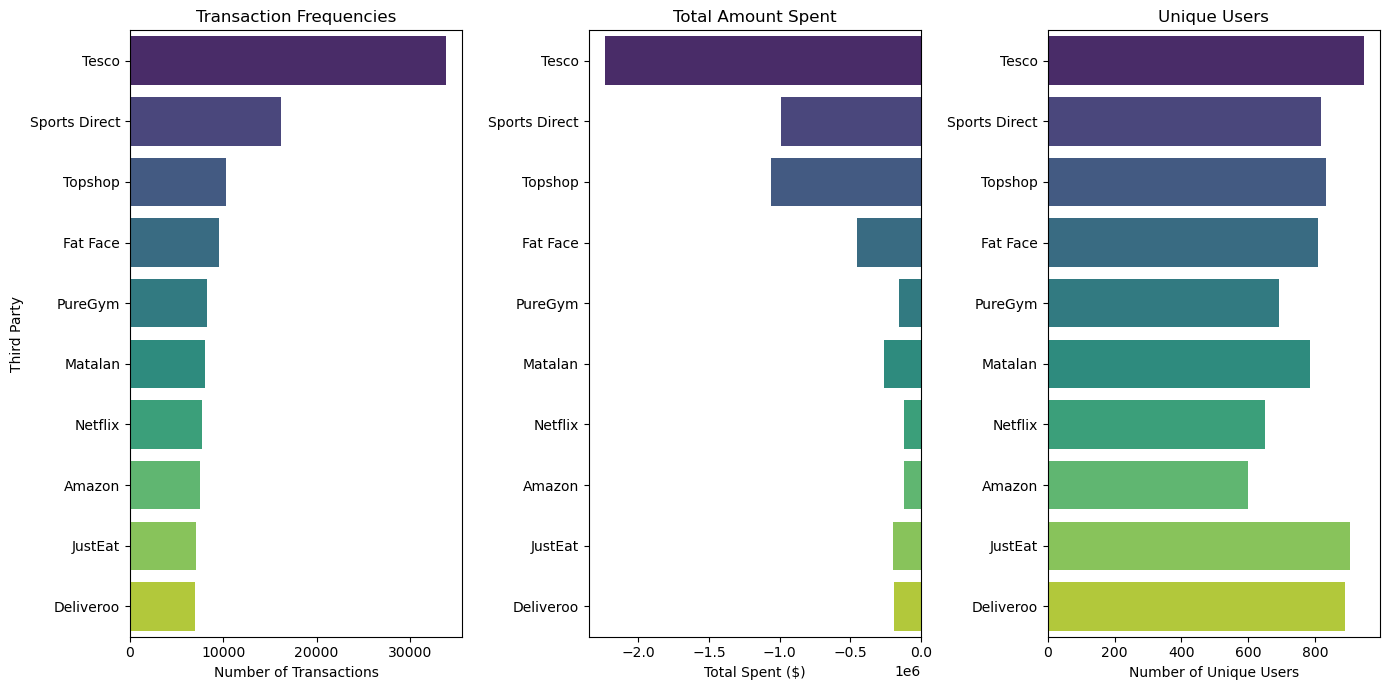

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'top_data' is already loaded and filtered for top third parties

# Calculate necessary metrics
transaction_frequencies = top_data['Third Party'].value_counts()
total_spent = top_data.groupby('Third Party')['Amount'].sum()
unique_users = top_data.groupby('Third Party')['Account No'].nunique()

# Creating a DataFrame for easy visualization
third_party_metrics = pd.DataFrame({
    'Transaction Frequencies': transaction_frequencies,
    'Total Amount Spent': total_spent,
    'Unique Users': unique_users
}).sort_values(by='Transaction Frequencies', ascending=False)  # Sorting for better visual representation

# Plotting
plt.figure(figsize=(14, 7))

# Subplot 1: Transaction Frequencies
plt.subplot(1, 3, 1)
sns.barplot(x=third_party_metrics['Transaction Frequencies'], y=third_party_metrics.index, palette='viridis')
plt.title('Transaction Frequencies')
plt.xlabel('Number of Transactions')
plt.ylabel('Third Party')

# Subplot 2: Total Amount Spent
plt.subplot(1, 3, 2)
sns.barplot(x=third_party_metrics['Total Amount Spent'], y=third_party_metrics.index, palette='viridis')
plt.title('Total Amount Spent')
plt.xlabel('Total Spent ($)')
plt.ylabel('')

# Subplot 3: Unique Users
plt.subplot(1, 3, 3)
sns.barplot(x=third_party_metrics['Unique Users'], y=third_party_metrics.index, palette='viridis')
plt.title('Unique Users')
plt.xlabel('Number of Unique Users')
plt.ylabel('')

plt.tight_layout()
plt.show()

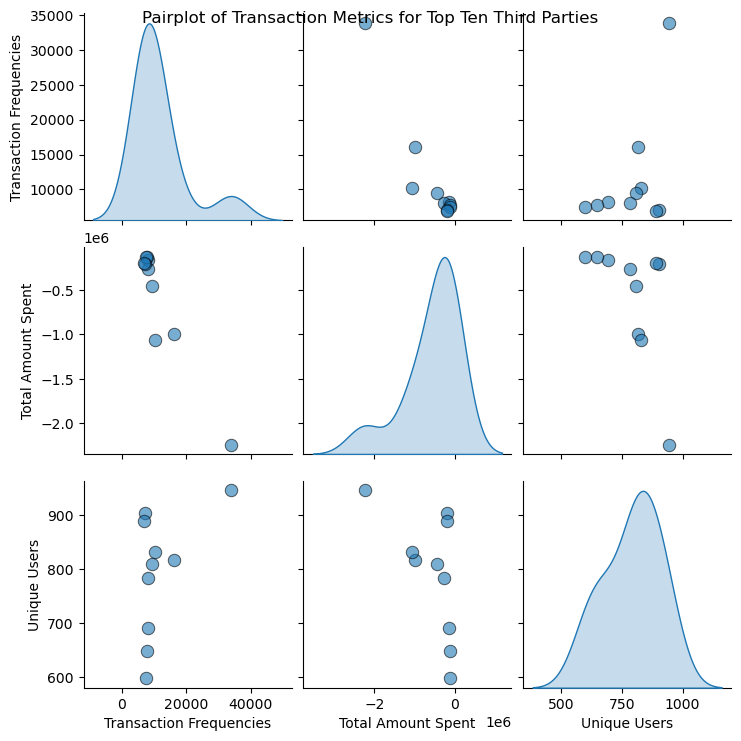

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'top_data' is already loaded and filtered for top third parties

# Calculate the metrics for each third party
transaction_frequencies = top_data['Third Party'].value_counts()
total_spent = top_data.groupby('Third Party')['Amount'].sum()
unique_users = top_data.groupby('Third Party')['Account No'].nunique()

# Creating a DataFrame for the analysis
analysis_df = pd.DataFrame({
    'Transaction Frequencies': transaction_frequencies,
    'Total Amount Spent': total_spent,
    'Unique Users': unique_users
})

# Ensure the DataFrame only contains the top ten third parties based on transaction frequencies
top_ten_third_parties = analysis_df.nlargest(10, 'Transaction Frequencies')

# Generating a pairplot of the top ten third parties
sns.pairplot(top_ten_third_parties, kind='scatter', diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'})
plt.suptitle('Pairplot of Transaction Metrics for Top Ten Third Parties')
plt.show()

              Balance                    Amount                    
                 mean          std         mean         std   count
Cluster                                                            
0         1723.502929  2325.921388   -79.182231  215.350954  186895
1        13662.848352  6114.614144   -55.148686  169.206828   34435
2         4403.013479  4821.374110  2315.222915  890.445729    7864


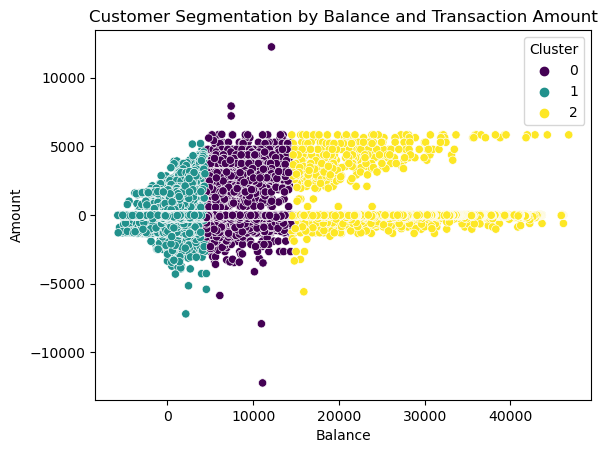

In [36]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and has the necessary columns
# Select the features you want to use for clustering
X = data[['Balance', 'Amount']].dropna()  # Dropping NA values to avoid errors during fitting

# Scale the data if necessary - Here we are assuming it's already appropriately scaled for simplicity

# Initialize KMeans with three clusters
kmeans = KMeans(n_clusters=3, random_state=0)
# Fit the model and predict cluster indices for X
X['Cluster'] = kmeans.fit_predict(X)

# Append cluster information back to the original data
data = data.join(X['Cluster'], how='left', rsuffix='_cluster')

# Analyze the characteristics of each cluster
cluster_summary = data.groupby('Cluster').agg({
    'Balance': ['mean', 'std'],
    'Amount': ['mean', 'std', 'count']
})
print(cluster_summary)

# Visualize the clusters
sns.scatterplot(x='Balance', y='Amount', hue='Cluster', data=X, palette='viridis')
plt.title('Customer Segmentation by Balance and Transaction Amount')
plt.xlabel('Balance')
plt.ylabel('Amount')
plt.legend(title='Cluster')
plt.show()


In [37]:
data

,Date,Account No,Balance,Amount,Third Party,Cluster,Transaction Type,Datetime,Day of Week,Hour of Day,Hour,Month,Month-Year,Year,Third Party Name,Third Party Account No,Cluster_cluster
0,01/01/2023,678330503,2971,1584,Westport Care Home,2,Credit,2023-01-01 00:00:00,Sunday,0,0,1,2023-01,2023,WESTPORT CARE HOME,NaN,1
1,01/01/2023,472213568,3792,1950,Barbiee Boutique,2,Credit,2023-01-01 00:00:00,Sunday,0,0,1,2023-01,2023,BARBIEE BOUTIQUE,NaN,1
2,01/01/2023,472213568,3012,-780,283027736,0,Debit,2023-01-01 00:00:00,Sunday,0,0,1,2023-01,2023,None,283027736.0,1
3,01/01/2023,283027736,1787,780,472213568,0,Credit,2023-01-01 00:00:00,Sunday,0,0,1,2023-01,2023,None,472213568.0,1
4,01/01/2023,624500124,3226,1825,Fat Face,2,Credit,2023-01-01 00:00:00,Sunday,0,0,1,2023-01,2023,FAT FACE,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230591,06/12/2023,581655972,45935,-41,Tesco,1,Debit,2023-06-12 20:54:00,Monday,20,20,6,2023-06,2023,TESCO,NaN,2
230592,06/12/2023,786141370,-245,-62,Sainsbury Local,0,Debit,2023-06-12 20:55:00,Monday,20,20,6,2023-06,2023,SAINSBURY LOCAL,NaN,1
230593,06/12/2023,824916823,9709,-33,Deliveroo,1,Debit,2023-06-12 21:05:00,Monday,21,21,6,2023-06,2023,DELIVEROO,NaN,0
230594,06/12/2023,366550080,26834,-19,Amazon,1,Debit,2023-06-12 21:13:00,Monday,21,21,6,2023-06,2023,AMAZON,NaN,2


## Transactions that are several standard deviations away from the mean might be considered suspicious:
- Transactions that are several standard deviations away from the mean might be considered suspicious:

In [38]:
# Calculate the mean and standard deviation
mean_amount = data['Amount'].mean()
std_amount = data['Amount'].std()

# Identify outliers as transactions that are more than 3 standard deviations from the mean
outliers = data[np.abs(data['Amount'] - mean_amount) > 3 * std_amount]

# Display outliers
outliers[['Datetime', 'Amount', 'Account No', 'Third Party', 'Transaction Type']]

,Datetime,Amount,Account No,Third Party,Transaction Type
0,2023-01-01 00:00:00,1584,678330503,Westport Care Home,Credit
1,2023-01-01 00:00:00,1950,472213568,Barbiee Boutique,Credit
4,2023-01-01 00:00:00,1825,624500124,Fat Face,Credit
5,2023-01-01 00:00:00,2842,203466392,Lavender Primary,Credit
6,2023-01-01 00:00:00,1950,768271776,A Cut Above,Credit
...,...,...,...,...,...
222503,2023-11-30 23:59:00,2110,514362267,124125096,Credit
222504,2023-01-12 00:00:00,1695,497809732,Fitted Stitch,Credit
222505,2023-01-12 00:00:00,1675,899692478,A Yarn Story,Credit
222508,2023-01-12 00:00:00,1675,370757362,Craftastic,Credit


## transactions occurring repeatedly at the same time to the same third party, which could indicate automated or scripted fraud:
- more than 5 times

In [42]:
# Group by account number, third party, and hour to see repetitive patterns
repetitive_patterns = data.groupby(['Account No', 'Third Party', 'Datetime']).size().reset_index(name='Count')

# Filter for patterns that occur more than a threshold, e.g., more than 5 times
suspicious_patterns = repetitive_patterns[repetitive_patterns['Count'] > 5]

# Display suspicious repetitive patterns
suspicious_patterns


,Account No,Third Party,Datetime,Count


## Visualisations

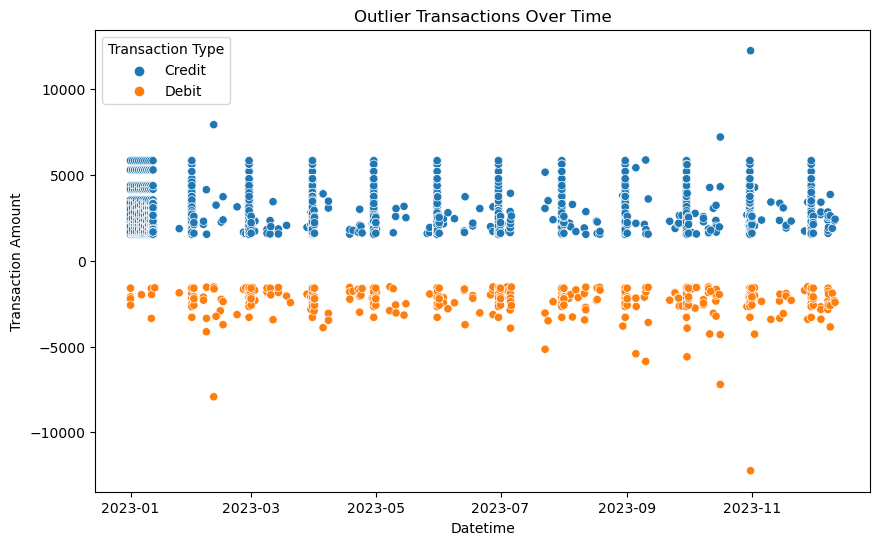

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot transaction amounts for outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Datetime', y='Amount', hue='Transaction Type',data=outliers)
plt.title('Outlier Transactions Over Time')
plt.xlabel('Datetime')
plt.ylabel('Transaction Amount')
plt.show()

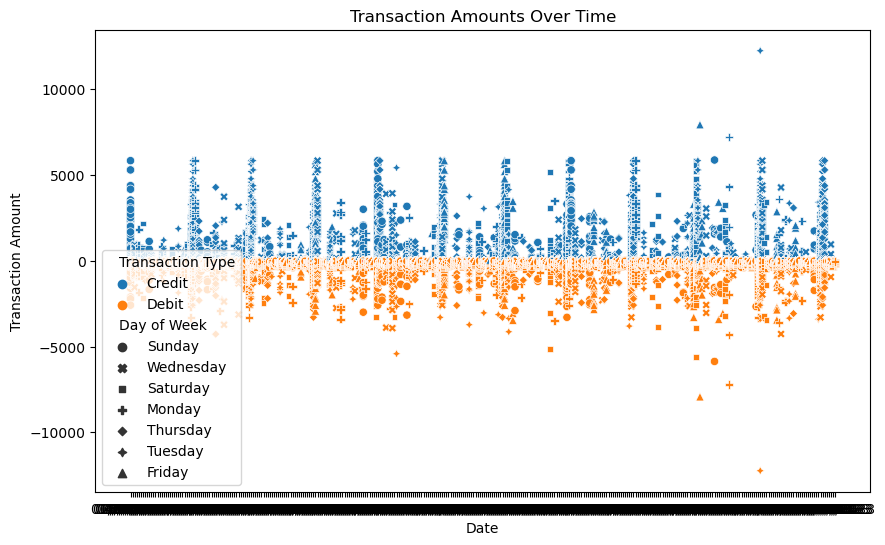

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot transaction amounts for potential outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Date', y='Amount', hue='Transaction Type', style='Day of Week', data=data)
plt.title('Transaction Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.show()


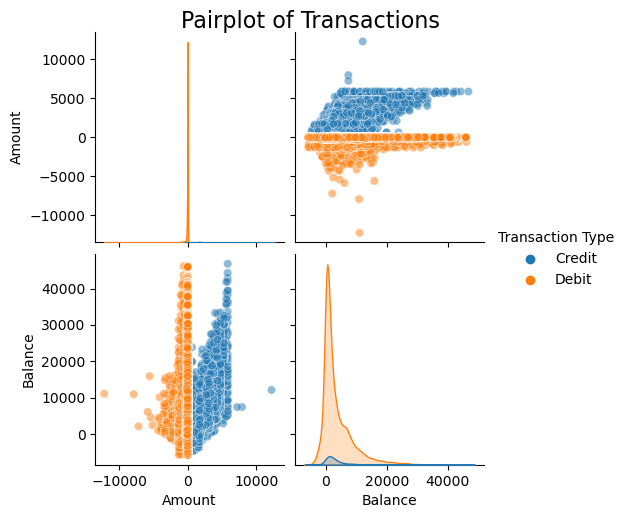

In [49]:
# Create pairplot for selected columns to visualize relationships and distributions
sns.pairplot(data[['Amount', 'Balance', 'Transaction Type']], hue='Transaction Type', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Transactions', size=16, y=1.02)
plt.show()

In [ ]:
##

## Monthly Banking Activity: Insights from Total Spent, Total Credited, and Transaction Count

In [51]:

# Using 'Grouper' to group by month directly

monthly_data = data.groupby(['Account No', pd.Grouper(key='Date', freq='M')]).agg(
    Total_Spent=pd.NamedAgg(column='Amount', aggfunc=lambda x: x[x < 0].sum()),
    Total_Credited=pd.NamedAgg(column='Amount', aggfunc=lambda x: x[x >= 0].sum()),
    Transaction_Count=pd.NamedAgg(column='Amount', aggfunc='count')
).reset_index()

# Converting 'Date' to 'Year-Month' format for easier reading
monthly_data['Date'] = monthly_data['Date'].dt.to_period('M')

# Display the first few rows of the modified monthly statistics
monthly_data.head(5)


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [ ]:
monthly_data.shape

In [ ]:
data['Account No'].unique().shape

## checking all the users spending evry month or not

In [52]:
# To ensure each account's activity is accounted for in every expected month of the dataset, 
# we'll check which months each account has transactions and list any missing months.

# First, get the full range of months from the dataset
full_date_range = pd.period_range(data['Date'].min(), data['Date'].max(), freq='M')

# Dictionary to store missing months for each account
missing_months_dict = {}

# Iterating over each account
for account, group in data.groupby('Account No'):
    present_months = group['Date'].dt.to_period('M').unique()
    missing_months = full_date_range[~full_date_range.isin(present_months)]
    if len(missing_months) > 0:
        missing_months_dict[account] = missing_months

# Create a list to store tuples of account number and missing month
missing_months_list = []

# Iterate over the dictionary and append tuples to the list
for account, missing_months in missing_months_dict.items():
    for month in missing_months:
        missing_months_list.append((account, month))

# Create a DataFrame from the list
missing_months_df = pd.DataFrame(missing_months_list, columns=['Account No', 'Missing Month'])

# Display the DataFrame
print(missing_months_df)


AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
## no.of transactions on each day..smtwthfss..
# find any trends
## his status at the end of month- whether he is in debt or credit

## fraud detection using transactional data

In [54]:
# Convert 'Date' and 'Timestamp' into a single datetime column for easier manipulation
#data['Timestamp'] = pd.to_datetime(data['Date'] + ' ' + data['Timestamp'], errors='coerce')

# Calculate mean and standard deviation for each account without storing them as columns
mean_amounts = data.groupby('Account No')['Amount'].transform('mean')
std_amounts = data.groupby('Account No')['Amount'].transform('std')

# Identify high-value transactions
high_value = data['Amount'] > (mean_amounts + 3 * std_amounts)

# Detect frequent transactions in short times by counting the transactions per minute for each account
frequent_transactions = data.groupby(['Account No', data['Timestamp'].dt.floor('min')])['Amount'].transform('size') > 3

# Check for transactions that are round figures
round_figure_transaction = data['Amount'].mod(1000) == 0

# Combine the criteria to filter potential fraudulent transactions
suspicious_transactions = data[high_value | frequent_transactions | round_figure_transaction]

# Display the suspicious transactions
print(suspicious_transactions[['Date', 'Timestamp', 'Account No', 'Amount', 'Third Party', 'Transaction Direction']])


KeyError: 'Timestamp'

In [ ]:
suspicious_transactions

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming suspicious_transactions is already defined
# and data['Timestamp'] has been created and is the datetime combination of 'Date' and 'Timestamp'

# 1. Scatter Plot of Transaction Amounts Over Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Timestamp', y='Amount', data=suspicious_transactions, hue='Transaction Direction', style='Transaction Direction')
plt.title('Suspicious Transactions Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.legend(title='Transaction Type')
plt.tight_layout()
plt.show()

# 2. Histogram of Transaction Amounts
plt.figure(figsize=(10, 6))
sns.histplot(suspicious_transactions['Amount'], bins=30, kde=False, color='red')
plt.title('Distribution of Suspicious Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming suspicious_transactions is already defined
# and data['Timestamp'] has been created and is the datetime combination of 'Date' and 'Timestamp'

# Extract more features from 'Timestamp' if needed
suspicious_transactions['Hour of Day'] = suspicious_transactions['Timestamp'].dt.hour
suspicious_transactions['Day of Week'] = suspicious_transactions['Timestamp'].dt.dayofweek

# Select columns to include in the pairplot
# Including 'Amount', 'Hour of Day', and 'Day of Week'
# If 'Transaction Direction' is categorical, it can be used as a hue
plot_data = suspicious_transactions[['Amount', 'Hour of Day', 'Day of Week', 'Transaction Direction']]

# Create the pairplot
sns.pairplot(plot_data, hue='Transaction Direction', diag_kind='kde', plot_kws={'alpha': 0.6, 's': 60, 'edgecolor': 'k'}, height=3)
plt.suptitle('Pairplot of Suspicious Transactions')
plt.show()
